In [ ]:
### Re-code the house price machine learning

In [ ]:
### 1. Random Choose Method to get optimal k and b

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [9]:
x, y = data['data'], data['target']


In [10]:
x[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [11]:
y[1]

21.600000000000001

In [13]:
len(x[:,0])

506

In [14]:
len(y)

506

In [19]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt

In [18]:
def draw_rm_and_price():
    plt.scatter(x[:,5],y)

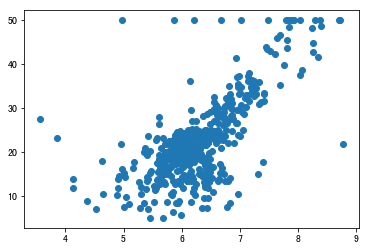

In [20]:
draw_rm_and_price()

In [23]:
import random

In [24]:
def price(rm, k, b):
    '''f(x) = k * k + b'''
    return k * rm + b

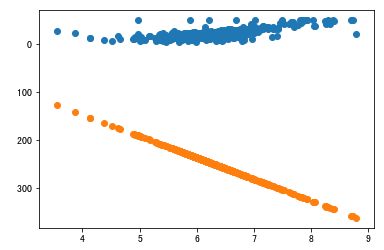

In [25]:
x_rm = x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)


In [26]:
list(y)

[24.0,
 21.600000000000001,
 34.700000000000003,
 33.399999999999999,
 36.200000000000003,
 28.699999999999999,
 22.899999999999999,
 27.100000000000001,
 16.5,
 18.899999999999999,
 15.0,
 18.899999999999999,
 21.699999999999999,
 20.399999999999999,
 18.199999999999999,
 19.899999999999999,
 23.100000000000001,
 17.5,
 20.199999999999999,
 18.199999999999999,
 13.6,
 19.600000000000001,
 15.199999999999999,
 14.5,
 15.6,
 13.9,
 16.600000000000001,
 14.800000000000001,
 18.399999999999999,
 21.0,
 12.699999999999999,
 14.5,
 13.199999999999999,
 13.1,
 13.5,
 18.899999999999999,
 20.0,
 21.0,
 24.699999999999999,
 30.800000000000001,
 34.899999999999999,
 26.600000000000001,
 25.300000000000001,
 24.699999999999999,
 21.199999999999999,
 19.300000000000001,
 20.0,
 16.600000000000001,
 14.4,
 19.399999999999999,
 19.699999999999999,
 20.5,
 25.0,
 23.399999999999999,
 18.899999999999999,
 35.399999999999999,
 24.699999999999999,
 31.600000000000001,
 23.300000000000001,
 19.600000000

loss = 1/n

In [ ]:
###loss

In [28]:
def loss(y,y_hat): 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

First-Method:Random generation: get best k and best b

In [37]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    price_by_random_k_and_b = [price(r, k ,b) for r in x_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 41.998992376145395 best_b: -10.97540175413161, and the loss is: 53679.43911415271
When time is : 4, get best_k: 21.835068905369155 best_b: -58.564503958338875, and the loss is: 3273.8456237479786
When time is : 7, get best_k: 10.405602592283358 best_b: -84.97435248640474, and the loss is: 1817.8372551008063
When time is : 36, get best_k: 5.329997746359965 best_b: -4.651621905368231, and the loss is: 90.46068716138156
When time is : 582, get best_k: 10.006530325357616 best_b: -35.50412275283847, and the loss is: 67.53048419784527
When time is : 976, get best_k: 5.6437041690022625 best_b: -13.04620679283623, and the loss is: 49.505651597808345
When time is : 1603, get best_k: 9.329364988676076 best_b: -36.528462309314726, and the loss is: 43.81057103142725


In [31]:
10 ** 0.5

3.1622776601683795

In [64]:
x_rm = x[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_x_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)

NameError: name 'draw_x_rm_and_price' is not defined

2nd-Method: Direction Adjusting

In [40]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1,-1),
    (+1,-1),
    (-1,-1),
    (-1,-1),
]

next_direction = random.choice(direction)

scalar = 0.1

update_time = 0

for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + k_direction*scalar, best_b + b_direction*scalar
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: #performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, 
                  best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)
                                                                      




In [35]:
float('inf')

inf

监督学习 导数

In [55]:
def partial_k(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
        
    return -2 / n * gradient

def partial_b(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [52]:
from icecream import ic

In [57]:
trying_times = 2000

x, y = data['data'], data['target']
min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04

update_time = 0

for i in range(trying_times):
    
     price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
        
     current_loss = loss(y, price_by_k_and_b)
    
     if current_loss < min_loss:
            min_loss = current_loss
            
            if i % 50 == 0:
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
     k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    
     b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    
     current_k = current_k + (-1 * k_gradient) * learning_rate
    
     current_b = current_b + (-1 * b_gradient) * learning_rate


When time is : 0, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 1536.0159055415143
When time is : 50, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 713.3358146454789
When time is : 100, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 352.0554817795877
When time is : 150, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 193.39712684463325
When time is : 200, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 123.71945610090827
When time is : 250, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 93.11732066773045
When time is : 300, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 79.67506116761709
When time is : 350, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 73.76849779692297
When time is : 400, get best_k: 94.1923672111948 best_b: -17.64926842321571, and the loss is: 71.1712080

In [58]:
y = 10

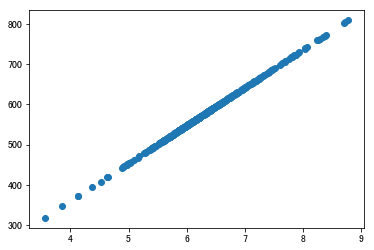

In [66]:
x_rm = x[:, 5]
k = 94.1923672111948
b = -17.64926842321571
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

#draw_rm_and_price()  ### I don't know why
plt.scatter(x_rm, price_by_random_k_and_b)